There are three things, you have to do, before building the dashboard.

The data contains missing values. For all three CSVs, use forward filling for imputing the missing data. Forward filling uses earlier values of the country for filling later ones (tip: there exist a Pandas function for that)
For each CSV, transform the dataframe into a so called "tidy data format" (see e.g. https://en.wikipedia.org/wiki/Tidy_data). Each dataframe then should have only three columns: (1) country, (2) year, (3) the KPI (that means either a) life expectancy, b) population, or 3) GNI per capita)
You have to merge all three CVS. Merge the three dataframe into one dataframe, that just has 5 columns (country, year and all three KPIs from the three dataframes)

In [2]:
import pandas as pd

In [3]:
df_life = pd.read_csv('data/life_expectancy_years.csv')
df_gni = pd.read_csv('data/ny_gnp_pcap_pp_cd.csv')
df_population = pd.read_csv('data/population_total.csv')

In [4]:
#check first column for nan values -> there we can't apply forward filling 
print(df_life.iloc[:,1].isna().sum())
print(df_gni.iloc[:,1].isna().sum())
print(df_population.iloc[:,1].isna().sum())

3
42
0


In [5]:
df_population = df_population.ffill(axis=1)
df_population.isna().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 302, dtype: int64

In [6]:
df_life = df_life.bfill(axis=1)
df_life = df_life.ffill(axis=1)
df_life.isna().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 302, dtype: int64

In [7]:
df_gni = df_gni.bfill(axis=1)
df_gni = df_gni.ffill(axis=1)
df_gni.isna().sum()
df_gni

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,...,1710.0,1700.0,1920.0,2020.0,2070.0,2110.0,2000.0,2090.0,2100.0,2190.0
1,Albania,2550.0,1880.0,1740.0,2110.0,2300.0,2710.0,3050.0,2780.0,3110.0,...,9540.0,10200.0,10500.0,10800.0,11400.0,11800.0,12200.0,13100.0,13800.0,14300.0
2,Algeria,6660.0,6510.0,6690.0,6630.0,6530.0,6710.0,6980.0,7120.0,7490.0,...,13100.0,13400.0,13100.0,12800.0,12700.0,11700.0,11500.0,11600.0,11600.0,11700.0
3,Angola,2990.0,3310.0,1630.0,1490.0,1260.0,2350.0,2420.0,2830.0,2820.0,...,5950.0,6130.0,6810.0,7130.0,7680.0,6960.0,6730.0,6860.0,6550.0,6380.0
4,Antigua and Barbuda,10500.0,11300.0,11600.0,12400.0,13200.0,12600.0,13500.0,14300.0,14900.0,...,20100.0,19700.0,19000.0,18200.0,18100.0,17700.0,18600.0,18800.0,20600.0,21800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,9450.0,10500.0,11000.0,11000.0,10700.0,11200.0,11200.0,11800.0,11700.0,...,16500.0,17100.0,17100.0,17100.0,17100.0,17100.0,17100.0,17100.0,17100.0,17100.0
182,Vietnam,860.0,930.0,1030.0,1120.0,1240.0,1380.0,1500.0,1630.0,1720.0,...,4050.0,4330.0,4840.0,5130.0,5470.0,5790.0,6300.0,6650.0,7290.0,7910.0
183,Yemen,2060.0,2090.0,2220.0,2260.0,2350.0,2370.0,2320.0,2400.0,2590.0,...,3920.0,3350.0,3340.0,3520.0,3520.0,3520.0,3520.0,3520.0,3520.0,3520.0
184,Zambia,1350.0,1320.0,1310.0,1430.0,1330.0,1360.0,1440.0,1480.0,1440.0,...,2970.0,3160.0,3360.0,3430.0,3470.0,3360.0,3300.0,3330.0,3550.0,3560.0


In [8]:
df_life = df_life.melt(id_vars=["country"], 
        var_name="year", 
        value_name="lifeExp")

df_gni = df_gni.melt(id_vars=["country"], 
        var_name="year", 
        value_name="GNIperCapita")

df_population = df_population.melt(id_vars=["country"], 
        var_name="year", 
        value_name="population")

In [9]:
df_2 = df_life.merge(df_gni)
df_all = df_2.merge(df_population)

In [10]:
df_all

,country,year,lifeExp,GNIperCapita,population
0,Afghanistan,1990,52.6,1520.0,12400000
1,Albania,1990,73.3,2550.0,3290000
2,Algeria,1990,71.7,6660.0,25800000
3,Angola,1990,47.9,2990.0,11800000
4,Antigua and Barbuda,1990,74.3,10500.0,62500
...,...,...,...,...,...
5455,Venezuela,2019,75.1,17100.0,28500000
5456,Vietnam,2019,74.7,7910.0,96500000
5457,Yemen,2019,68.1,3520.0,29200000
5458,Zambia,2019,64.0,3560.0,17900000


In [11]:
df_all.isna().sum()

country         0
year            0
lifeExp         0
GNIperCapita    0
population      0
dtype: int64

In [12]:
df_all[df_all.year == "1990"]

,country,year,lifeExp,GNIperCapita,population
0,Afghanistan,1990,52.6,1520.0,12400000
1,Albania,1990,73.3,2550.0,3290000
2,Algeria,1990,71.7,6660.0,25800000
3,Angola,1990,47.9,2990.0,11800000
4,Antigua and Barbuda,1990,74.3,10500.0,62500
...,...,...,...,...,...
177,Venezuela,1990,72.1,9450.0,19600000
178,Vietnam,1990,68.9,860.0,68000000
179,Yemen,1990,58.7,2060.0,11700000
180,Zambia,1990,50.7,1350.0,8040000


In [30]:
country = ["Algeria", "Albania"]

In [46]:
np.power()

ValueError: invalid number of arguments

In [57]:
np.log(df_all.lifeExp.max())

4.443827035579329

In [63]:
max_gni = np.log(df_all.GNIperCapita.max())
min_gni = np.log(df_all.GNIperCapita.min())
max_gni

11.790557201568507

In [62]:
np.log(132000.0)

11.790557201568507

In [60]:
df_all

,country,year,lifeExp,GNIperCapita,population
0,Afghanistan,1990,52.6,1520.0,12400000
1,Albania,1990,73.3,2550.0,3290000
2,Algeria,1990,71.7,6660.0,25800000
3,Angola,1990,47.9,2990.0,11800000
4,Antigua and Barbuda,1990,74.3,10500.0,62500
...,...,...,...,...,...
5455,Venezuela,2019,75.1,17100.0,28500000
5456,Vietnam,2019,74.7,7910.0,96500000
5457,Yemen,2019,68.1,3520.0,29200000
5458,Zambia,2019,64.0,3560.0,17900000


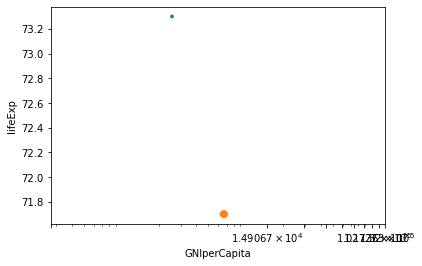

In [49]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# data
year = "1990"
data = df_all[df_all.year == year]
data = data[data['country'].isin(country)]


max_value = np.log(df_all.GNIperCapita.max())
min_value = np.log(df_all.GNIperCapita.min())

# use the scatterplot function to build the bubble map
ax = sns.scatterplot(data=data, x="GNIperCapita", y="lifeExp", size="population", hue = "country", legend=False)
ax.set_xscale('log')
#ax.set(xlim = np.linspace(df_all.GNIperCapita.min(), df_all.GNIperCapita.max(), 10)) # maximum GNI per Capita with log transformation 
ax.set_xticks(np.linspace(df_all.GNIperCapita.min(), df_all.GNIperCapita.max(), 10))
# show the graph
plt.show()

In [23]:
int(np.unique(df_all.year).min())

1990

In [57]:
import streamlit as st
options = st.multiselect('Select one or more countries.', np.unique(df_all.country))

2021-05-03 20:01:38.694 WARNING root: 
  command:

    streamlit run /Users/quynhtran/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [59]:
np.unique(df_all.year)

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'], dtype=object)

In [19]:
color = st.select_slider('Select a year', options= np.unique(df_all.year))

SyntaxError: invalid syntax (<ipython-input-19-9b3e3a99cd9b>, line 1)

In [13]:
df_all[df_all.Year == "1990"]

,country,Year,Life Expectancy,GNI per Capita,Population
0,Afghanistan,1990,52.6,1520.0,12400000
1,Albania,1990,73.3,2550.0,3290000
2,Algeria,1990,71.7,6660.0,25800000
3,Angola,1990,47.9,2990.0,11800000
4,Antigua and Barbuda,1990,74.3,10500.0,62500
...,...,...,...,...,...
177,Venezuela,1990,72.1,9450.0,19600000
178,Vietnam,1990,68.9,860.0,68000000
179,Yemen,1990,58.7,2060.0,11700000
180,Zambia,1990,50.7,1350.0,8040000


In [1]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # data set

# data
data = gapminder.loc[gapminder.year == 2007]

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

ModuleNotFoundError: No module named 'gapminder'